In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
lifetime_giving = pd.read_csv('NP.LifetimeGiving.csv')

In [4]:
print(lifetime_giving.head())

   Account Number  First Received Amount First Received Date  \
0               4                   50.0            8/4/2004   
1               6                   25.0            8/1/1998   
2               8                  100.0            4/4/2002   
3               9                  100.0          12/19/2000   
4              10                   25.0           5/11/1999   

   Largest Received Amount Largest Received Date  \
0                     50.0              8/4/2004   
1                     25.0              8/1/1998   
2                    100.0              4/4/2002   
3                    100.0            12/19/2000   
4                     25.0             5/11/1999   

   Lifetime Received & Soft Credit Amount  Lifetime Received Total  \
0                                    50.0                     50.0   
1                                    50.0                     50.0   
2                                   760.0                    760.0   
3                     

In [9]:
lifetime_giving.columns = ['ID', 'First_Gift', 'FG_Date', 'Largest_Gift', 'LG_Date', 'Lifetime_Gifts_SC', 'Lifetime_Gifts', 'Yrs_Donated']
print(lifetime_giving.head())

   ID  First_Gift     FG_Date  Largest_Gift     LG_Date  Lifetime_Gifts_SC  \
0   4        50.0    8/4/2004          50.0    8/4/2004               50.0   
1   6        25.0    8/1/1998          25.0    8/1/1998               50.0   
2   8       100.0    4/4/2002         100.0    4/4/2002              760.0   
3   9       100.0  12/19/2000         100.0  12/19/2000              100.0   
4  10        25.0   5/11/1999          25.0   5/11/1999               50.0   

   Lifetime_Gifts  Yrs_Donated  
0            50.0            1  
1            50.0            2  
2           760.0           14  
3           100.0            1  
4            50.0            1  


In [10]:
# statistics about number of years donated

yrs_donated_mean = np.mean(lifetime_giving['Yrs_Donated'])
yrs_donated_median = np.median(lifetime_giving['Yrs_Donated'])
print('# of donors ' + str(lifetime_giving.Yrs_Donated.count()))
print('Average years donated: ' + str(lifetime_giving.Yrs_Donated.mean()))
print('Median years donated: ' + str(lifetime_giving.Yrs_Donated.median()))
#print('Mode years donated: ' + str(lifetime_giving.Yrs_Donated.mode()))
print('Most number of years donated: ' + str(lifetime_giving.Yrs_Donated.max()))
print('Number of donors per each year of giving: ' + str(lifetime_giving.Yrs_Donated.value_counts()))
print('Number of donors who gave 3 or more years: ' + str(sum(float(num) >= 3 for num in lifetime_giving['Yrs_Donated'])))
print('Number of donors who gave 5 or more years: ' + str(sum(float(num) >= 5 for num in lifetime_giving['Yrs_Donated'])))

# of donors 3830
Average years donated: 3.1924281984334204
Median years donated: 1.0
Most number of years donated: 24
Number of donors per each year of giving: 1     1945
2      624
3      313
4      190
5      128
6      113
7       84
8       66
9       51
11      49
12      42
10      39
14      35
13      33
16      23
15      21
17      18
18      17
19      15
21       8
20       7
22       6
23       2
24       1
Name: Yrs_Donated, dtype: int64
Number of donors who gave 3 or more years: 1261
Number of donors who gave 5 or more years: 758


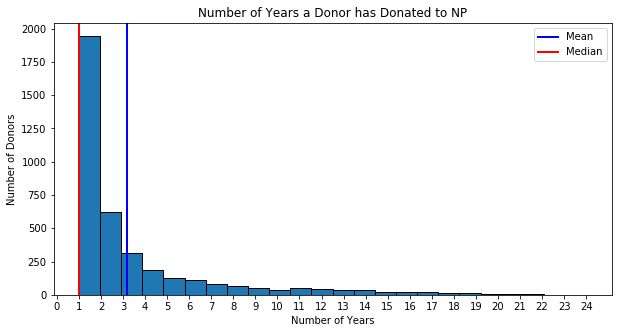

In [12]:
# plots of 'Yrs_Donated' data
# plt.subplot()
plt.figure(figsize = (10, 5))
plt.hist(lifetime_giving['Yrs_Donated'], bins = 24, edgecolor = 'black')
plt.axvline(yrs_donated_mean, color='b', linestyle='-', linewidth=2, label='Mean')
plt.axvline(yrs_donated_median, color='r', linestyle='solid', linewidth=2, label='Median')
plt.title('Number of Years a Donor has Donated to NP')
plt.xlabel('Number of Years')
plt.ylabel('Number of Donors')
plt.legend()
ax = plt.subplot()
ax.set_xticks(range(25))
plt.savefig('years_donated.png')
plt.show()


In [13]:
# stats about lifetime giving

total_lifetime_giving = sum(lifetime_giving['Lifetime_Gifts_SC'])
lifetime_giving_mean = np.mean(lifetime_giving['Lifetime_Gifts_SC'])
lifetime_giving_median = np.median(lifetime_giving['Lifetime_Gifts_SC'])
print('Total lifetime giving - all donors: $' + str(total_lifetime_giving))
print('Average lifetime giving: ' + str(lifetime_giving.Lifetime_Gifts_SC.mean()))
print('Median lifetime giving: ' + str(lifetime_giving.Lifetime_Gifts_SC.median()))
#print('Mode years donated: ' + str(lifetime_giving.Yrs_Donated.mode()))
print('Largest lifetime giving total: ' + str(lifetime_giving.Lifetime_Gifts_SC.max()))
print('Number of donors per each lifetime giving total: ' + str(lifetime_giving.Lifetime_Gifts_SC.value_counts()))
print('Number of donors who gave $10,000 or more lifetime: ' + str(sum(float(num) >= 10000 for num in lifetime_giving['Lifetime_Gifts_SC'])))
print('Number of donors who gave $50,000 or more lifetime: ' + str(sum(float(num) >= 50000 for num in lifetime_giving['Lifetime_Gifts_SC'])))

Total lifetime giving - all donors: $10161339.43
Average lifetime giving: 2653.091234986945
Median lifetime giving: 150.0
Largest lifetime giving total: 1477046.62
Number of donors per each lifetime giving total: 100.00      793
50.00       244
200.00      226
25.00       200
150.00       98
           ... 
12450.00      1
8.05          1
1222.00       1
3180.00       1
999.99        1
Name: Lifetime_Gifts_SC, Length: 735, dtype: int64
Number of donors who gave $10,000 or more lifetime: 138
Number of donors who gave $50,000 or more lifetime: 24


In [14]:
# create donor buckets
donors_less_than_500 = (sum(float(num) < 500 for num in lifetime_giving['Lifetime_Gifts_SC']))
donors_500 = (sum(float(num) >= 500 and float(num) < 1000 for num in lifetime_giving['Lifetime_Gifts_SC']))
donors_1000 = (sum(float(num) >= 1000 and float(num) < 5000 for num in lifetime_giving['Lifetime_Gifts_SC']))
donors_5000 = (sum(float(num) >= 5000 and float(num) < 10000 for num in lifetime_giving['Lifetime_Gifts_SC']))
donors_10000 = (sum(float(num) >= 10000 and float(num) <= 50000 for num in lifetime_giving['Lifetime_Gifts_SC']))
donors_50000 = (sum(float(num) >= 50000 for num in lifetime_giving['Lifetime_Gifts_SC']))
print(donors_less_than_500)
print(donors_500)
print(donors_1000)
print(donors_5000)
print(donors_10000)
print(donors_50000)

lifetime_giving_levels = np.array([donors_less_than_500, donors_500, donors_1000, donors_5000, donors_10000, donors_50000])

2717
313
569
93
116
24


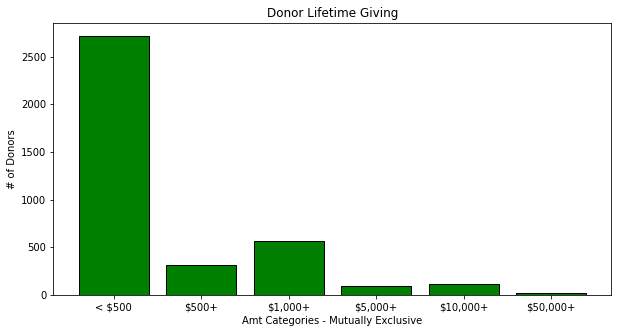

In [15]:
x = ['< $500', '$500+', '$1,000+', '$5,000+', '$10,000+', '$50,000+']
plt.figure(figsize = (10, 5))
plt.bar(x, lifetime_giving_levels, facecolor = 'green', edgecolor = 'black')
# plt.axvline(lifetime_giving_mean, color='b', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(lifetime_giving_median, color='r', linestyle='solid', linewidth=2, label='Median')
plt.title('Donor Lifetime Giving')
plt.xlabel('Amt Categories - Mutually Exclusive')
plt.ylabel('# of Donors')
# plt.legend()
# ax = plt.subplot()
# ax.set_xticks(range(6))
plt.savefig('lifetime_giving.png')
plt.show()